# maxvogt-analysis: Pfungen

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [PFU029](https://mtwente.github.io/maxvogt/items/pfu029.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Fpfungen.ipynb)

In [28]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [29]:
place = 'Pfungen'
point = 47.51608, 8.64626
address = 'Bahnhofstrasse 14, 8422 Pfungen'
dist = 2000
local_crs = 'EPSG:2056'

In [30]:
geopandas.tools.geocode(address).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [31]:
#buildings = osmnx.features.features_from_place(place, tags={'building':True})
#buildings = osmnx.features.features_from_address(address, tags={'building':True}, dist=dist)
buildings = osmnx.features.features_from_point(point, tags={'building':True}, dist=dist)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [32]:
buildings

access description opening_hours operator phone  \
element_type osmid                                                        
way          37404569      NaN         NaN           NaN      NaN   NaN   
             41829660      NaN         NaN           NaN      NaN   NaN   
             41829664      NaN         NaN           NaN      NaN   NaN   
             41829665      NaN         NaN           NaN      NaN   NaN   
             41829666      NaN         NaN           NaN      NaN   NaN   
...                        ...         ...           ...      ...   ...   
             1284839104    NaN         NaN           NaN      NaN   NaN   
             1300112015    NaN         NaN           NaN      NaN   NaN   
             1300112016    NaN         NaN           NaN      NaN   NaN   
relation     12137867      NaN         NaN           NaN      NaN   NaN   
             13007494      NaN         NaN           NaN      NaN   NaN   

                                                                  geometry  \
element_type osmid                                                           
way          37404569    POLYGON ((8.62473 47.50578, 8.62482 47.50598, ...   
             41829660    POLYGON ((8.67296 47.52260, 8.67291 47.52266, ...   
             41829664    POLYGON ((8.67266 47.52302, 8.67271 47.52296, ...   
             41829665    POLYGON ((8.67293 47.52318, 8.67288 47.52324, ...   
             41829666    POLYGON ((8.67276 47.52332, 8.67295 47.52339, ...   
...                                                                    ...   
             1284839104  POLYGON ((8.64677 47.51602, 8.64676 47.51599, ...   
             1300112015  POLYGON ((8.64141 47.52207, 8.64145 47.52209, ...   
             1300112016  POLYGON ((8.64130 47.52198, 8.64134 47.52200, ...   
relation     12137867    POLYGON ((8.64751 47.51532, 8.64743 47.51484, ...   
             13007494    POLYGON ((8.64996 47.51863, 8.65008 47.51818, ...   

                        amenity   addr:city addr:housenumber addr:postcode  \
element_type osmid                                                           
way          37404569       NaN     Embrach             65.2          8424   
             41829660       NaN         NaN              NaN           NaN   
             41829664       NaN  Neftenbach               24          8413   
             41829665       NaN  Neftenbach              13a          8413   
             41829666       NaN  Neftenbach               13          8413   
...                         ...         ...              ...           ...   
             1284839104     NaN         NaN              NaN           NaN   
             1300112015     NaN  Neftenbach               40          8413   
             1300112016     NaN  Neftenbach               42          8413   
relation     12137867       NaN     Pfungen              44b          8422   
             13007494       NaN         NaN              NaN           NaN   

                         ... man_made alt_name contact:email contact:website  \
element_type osmid       ...                                                   
way          37404569    ...      NaN      NaN           NaN             NaN   
             41829660    ...      NaN      NaN           NaN             NaN   
             41829664    ...      NaN      NaN           NaN             NaN   
             41829665    ...      NaN      NaN           NaN             NaN   
             41829666    ...      NaN      NaN           NaN             NaN   
...                      ...      ...      ...           ...             ...   
             1284839104  ...      NaN      NaN           NaN             NaN   
             1300112015  ...      NaN      NaN           NaN             NaN   
             1300112016  ...      NaN      NaN           NaN             NaN   
relation     12137867    ...      NaN      NaN           NaN             NaN   
             13007494    ...      NaN      NaN           N

In [33]:
buildings.geom_type.value_counts()

Polygon    3159
Name: count, dtype: int64

In [34]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [35]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [36]:
buildings["uID"] = range(len(buildings))

In [37]:
buildings

geometry   uID
0     POLYGON ((2689357.562 1262344.433, 2689363.371...     0
1     POLYGON ((2692960.930 1264270.616, 2692956.799...     1
2     POLYGON ((2692937.899 1264316.870, 2692941.849...     2
3     POLYGON ((2692958.057 1264335.457, 2692953.987...     3
4     POLYGON ((2692944.973 1264350.308, 2692958.666...     4
...                                                 ...   ...
3154  POLYGON ((2690999.681 1263509.099, 2690999.355...  3154
3155  POLYGON ((2690585.633 1264175.367, 2690588.900...  3155
3156  POLYGON ((2690577.514 1264165.423, 2690580.696...  3156
3157  POLYGON ((2691056.834 1263431.505, 2691051.788...  3157
3158  POLYGON ((2691235.439 1263802.811, 2691245.672...  3158

[3159 rows x 2 columns]

### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [38]:
#osm_graph = osmnx.graph_from_place(place, network_type='drive', truncate_by_edge=True)
#osm_graph = osmnx.graph_from_address(place, network_type='drive', truncate_by_edge=True, dist=dist)
osm_graph = osmnx.graph_from_point(point, network_type='drive', truncate_by_edge=True, dist=dist)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [39]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [40]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [41]:
streets.explore()

In [42]:
streets

osmid   lanes  ref  \
u           v          key                                                   
25428254    25428893   0                             37103114       2    7   
            431486791  0                             37103140     NaN  NaN   
            25430556   0    [277655232, 277655235, 277655231]  [2, 3]    7   
25428893    431485940  0                [277655234, 37103108]  [1, 2]    7   
            25428254   0                             37103114       2    7   
...                                                       ...     ...  ...   
10741066807 303598903  0                           1235818305     NaN    7   
2094247362  2094247182 0                            199423822     NaN  NaN   
2582416633  2582416633 0                            252138825     NaN  NaN   
                       1                            252138825     NaN  NaN   
            2582416627 0                            252138825     NaN  NaN   

                                       name      highway maxspeed  oneway  \
u           v          key                                                  
25428254    25428893   0      Weiachstrasse      primary       60   False   
            431486791  0     Allmendstrasse  residential      NaN   False   
            25430556   0      Weiachstrasse      primary       60   False   
25428893    431485940  0      Weiachstrasse      primary       60    True   
            25428254   0      Weiachstrasse      primary       60   False   
...                                     ...          ...      ...     ...   
10741066807 303598903  0    Weiacherstrasse      primary      NaN    True   
2094247362  2094247182 0            Am Bach  residential       30   False   
2582416633  2582416633 0     Allmendstrasse  residential      NaN   False   
                       1     Allmendstrasse  residential      NaN   False   
            2582416627 0     Allmendstrasse  residential      NaN   False   

                           reversed   length  \
u           v          key                     
25428254    25428893   0       True  283.528   
            431486791  0      False   86.447   
            25430556   0      False  295.924   
25428893    431485940  0      False  174.011   
            25428254   0      False  283.528   
...                             ...      ...   
10741066807 303598903  0      False   17.393   
2094247362  2094247182 0       True   97.858   
2582416633  2582416633 0      False   80.455   
                       1       True   80.455   
            2582416627 0       True  184.468   

                                                                     geometry  \
u           v          key                                                      
25428254    25428893   0    LINESTRING (2692346.132 1263795.144, 2692285.7...   
            431486791  0    LINESTRING (2692346.132 1263795.144, 2692344.3...   
            25430556   0    LINESTRING (2692346.132 1263795.144, 2692405.8...   
25428893    431485940  0    LINESTRING (2692073.821 1263876.753, 2692020.3...   
            25428254   0    LINESTRING (2692073.821 1263876.753, 2692162.8...   
...                                                                       ...   
10741066807 303598903  0    LINESTRING (2691307.860 1263704.906, 2691311.1...   
2094247362  2094247182 0    LINESTRING (2692523.852 1264985.274, 2692516.2...   
2582416633  2582416633 0    LINESTRING (2689973.740 1263824.911, 2689961.8...   
                       1    LINESTRING (2689973.740 1263824.911, 2689953.6...   
            2582416627 0    LINESTRING (2689973.740 1263824.911, 2690017.3...   

                           bridge    junction access  
u           v          key                            
25428254    25428893   0      NaN         NaN    NaN  
            431486791  0      NaN         NaN    NaN  
            25430556   0      NaN         NaN    NaN  
25428893    431485940  0      NaN         NaN    NaN  
            25428254   0      

In [43]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

In [44]:
streets

geometry  nID
0    LINESTRING (2692346.132 1263795.144, 2692285.7...    0
1    LINESTRING (2692346.132 1263795.144, 2692344.3...    1
2    LINESTRING (2692346.132 1263795.144, 2692405.8...    2
3    LINESTRING (2692073.821 1263876.753, 2692020.3...    3
4    LINESTRING (2692073.821 1263876.753, 2692162.8...    4
..                                                 ...  ...
584  LINESTRING (2691479.104 1262596.106, 2691493.4...  584
585  LINESTRING (2692915.991 1264270.154, 2692932.8...  585
586  LINESTRING (2693272.094 1263738.251, 2693260.6...  586
587  LINESTRING (2692799.464 1264134.870, 2692811.3...  587
588  LINESTRING (2693485.222 1265686.679, 2693367.2...  588

[589 rows x 2 columns]

## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [45]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [46]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [47]:
buildings

geometry   uID  index_right  \
0     POLYGON ((2689357.562 1262344.433, 2689363.371...     0           31   
0     POLYGON ((2689357.562 1262344.433, 2689363.371...     0           34   
1     POLYGON ((2692960.930 1264270.616, 2692956.799...     1          246   
1     POLYGON ((2692960.930 1264270.616, 2692956.799...     1          272   
2     POLYGON ((2692937.899 1264316.870, 2692941.849...     2          245   
...                                                 ...   ...          ...   
3156  POLYGON ((2690577.514 1264165.423, 2690580.696...  3156          200   
3157  POLYGON ((2691056.834 1263431.505, 2691051.788...  3157          332   
3157  POLYGON ((2691056.834 1263431.505, 2691051.788...  3157          327   
3158  POLYGON ((2691235.439 1263802.811, 2691245.672...  3158          443   
3158  POLYGON ((2691235.439 1263802.811, 2691245.672...  3158          441   

      nID  
0      31  
0      34  
1     246  
1     272  
2     245  
...   ...  
3156  200  
3157  332  
3157  327  
3158  443  
3158  441  

[4733 rows x 4 columns]

In [48]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [49]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [50]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [51]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [52]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [53]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [54]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


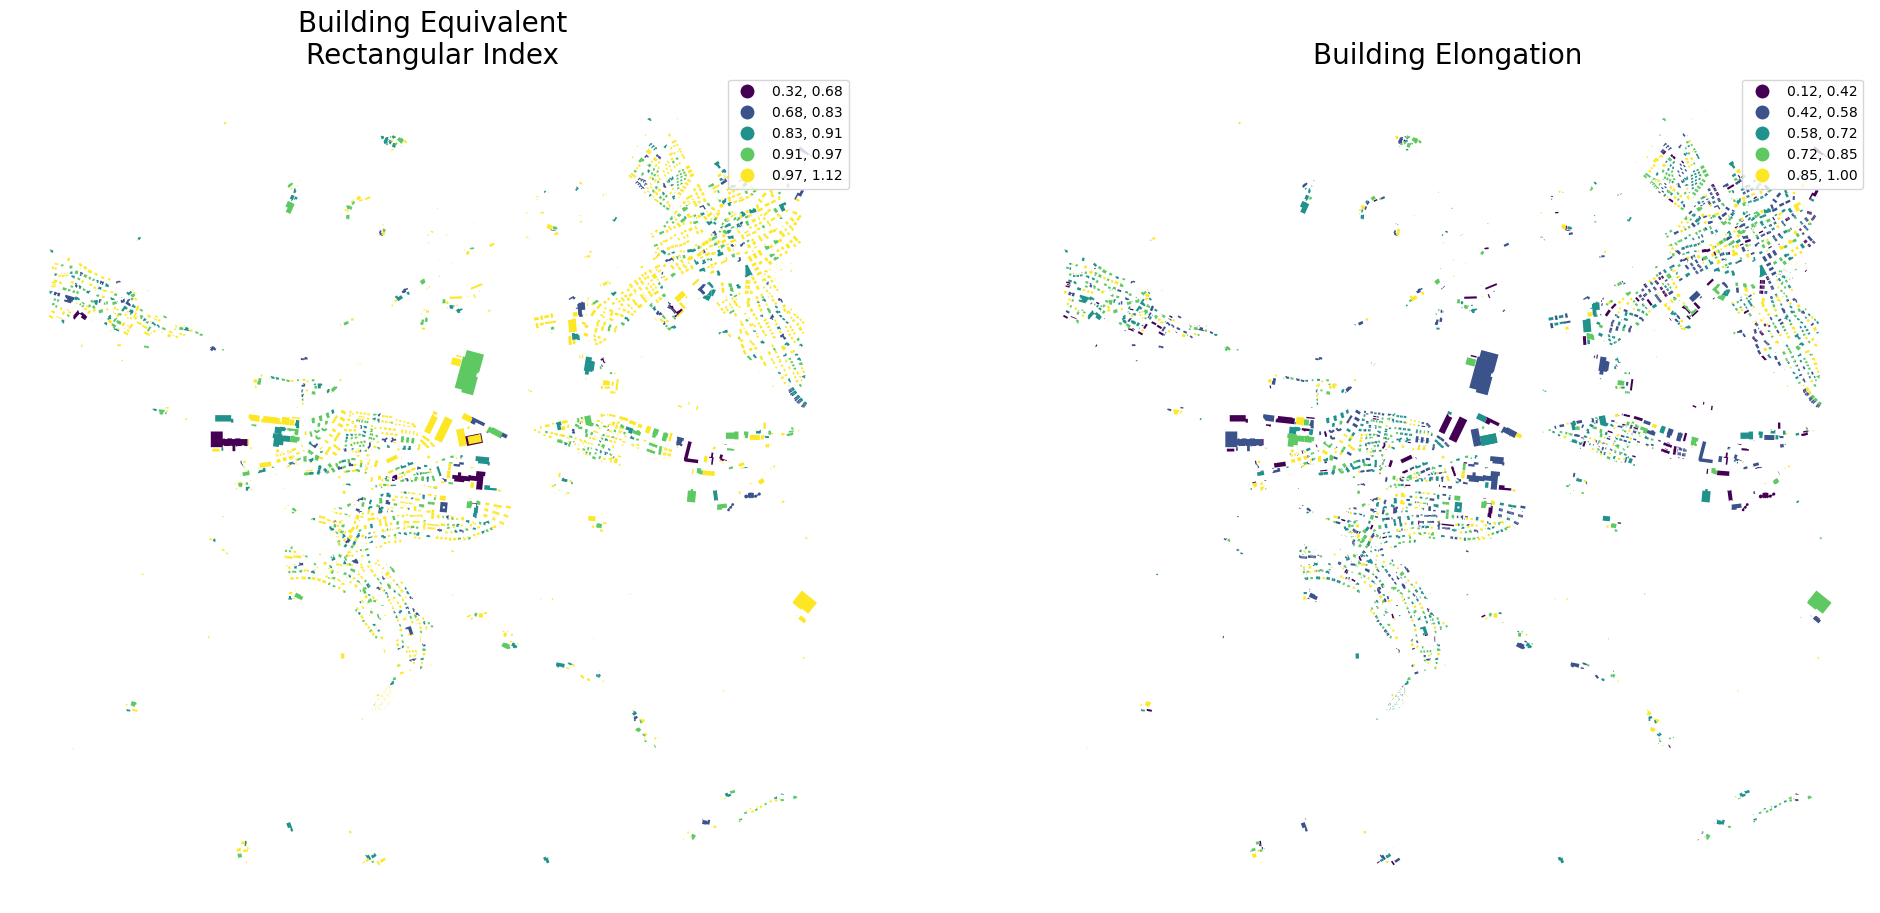

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Pfungen/eri_and_elongation.svg')  

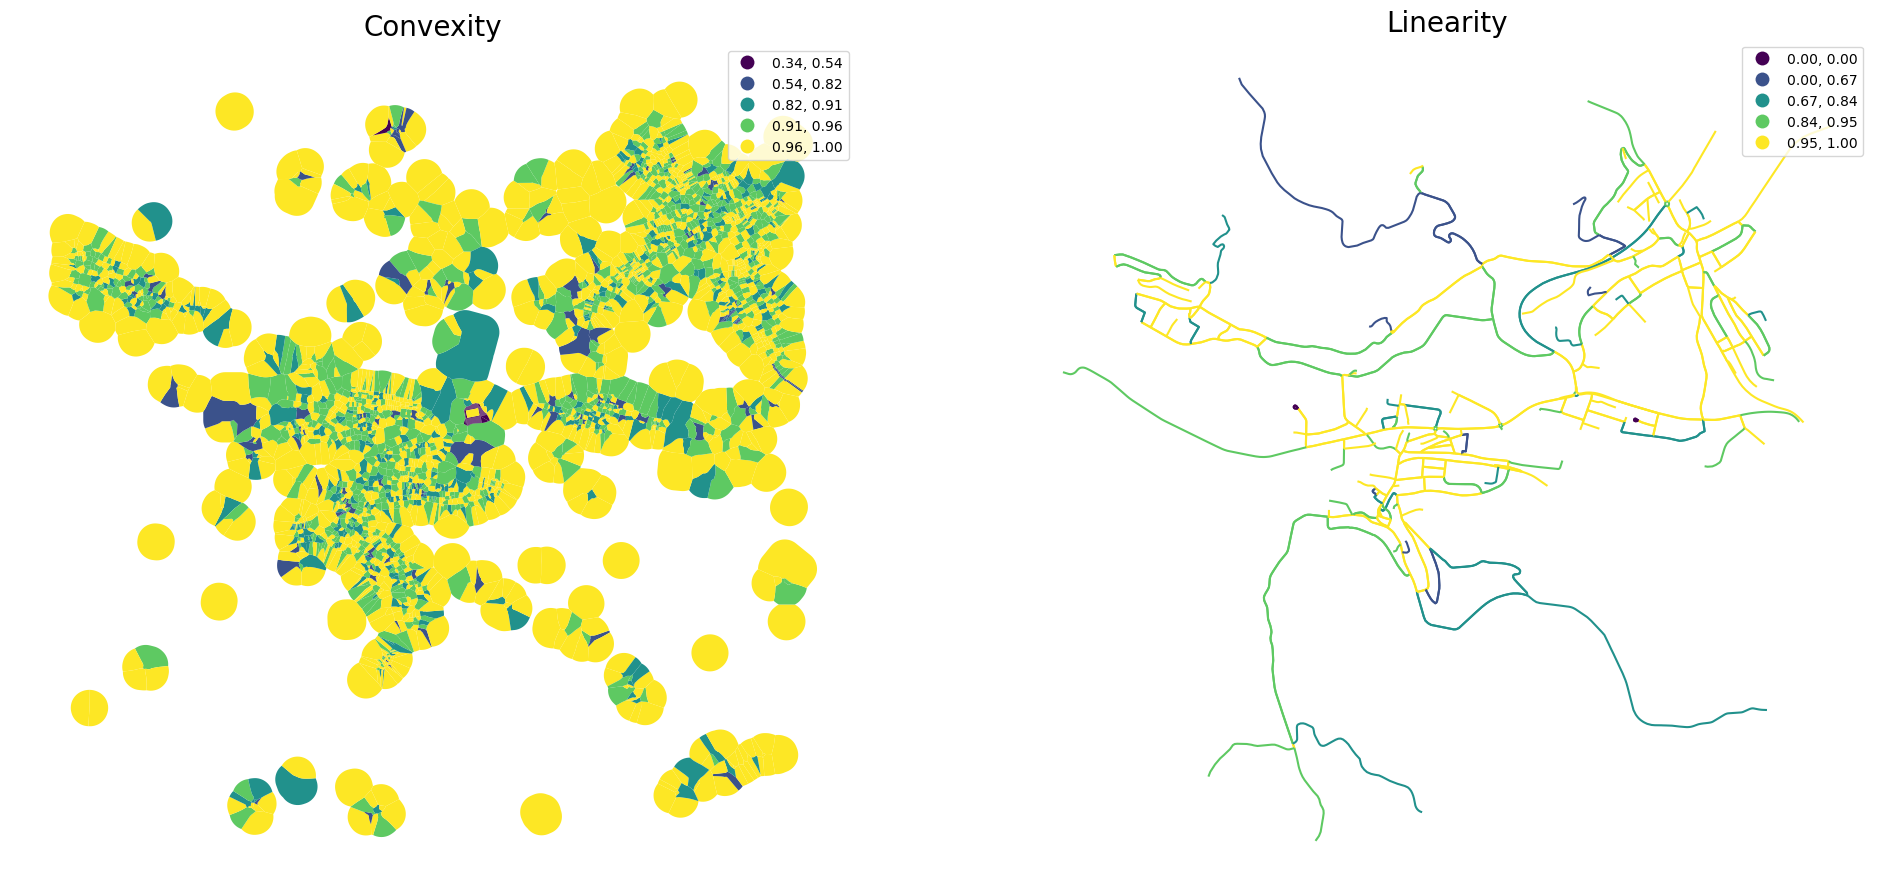

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Pfungen/convexity_and_linearity.svg')  

### Spatial distribution

In [57]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)


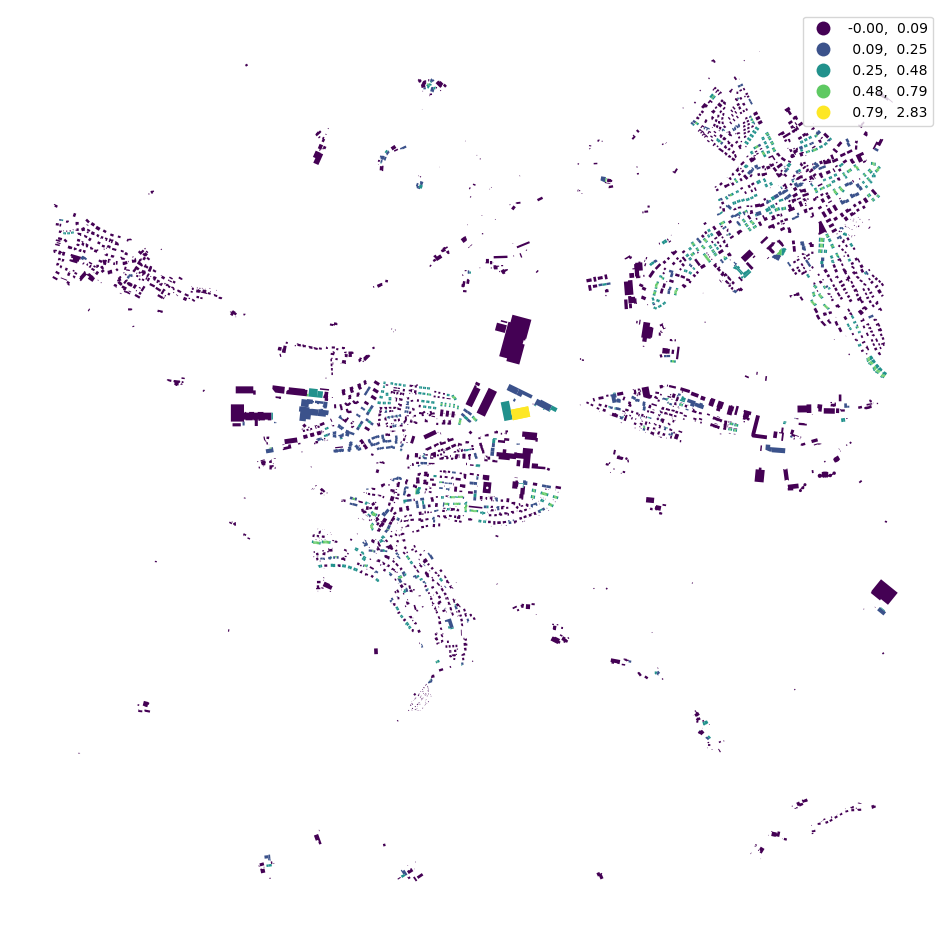

In [58]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Pfungen/sharedwalls.svg')  

Generate spatial weights matrix using `libpysal`.

In [59]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [60]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


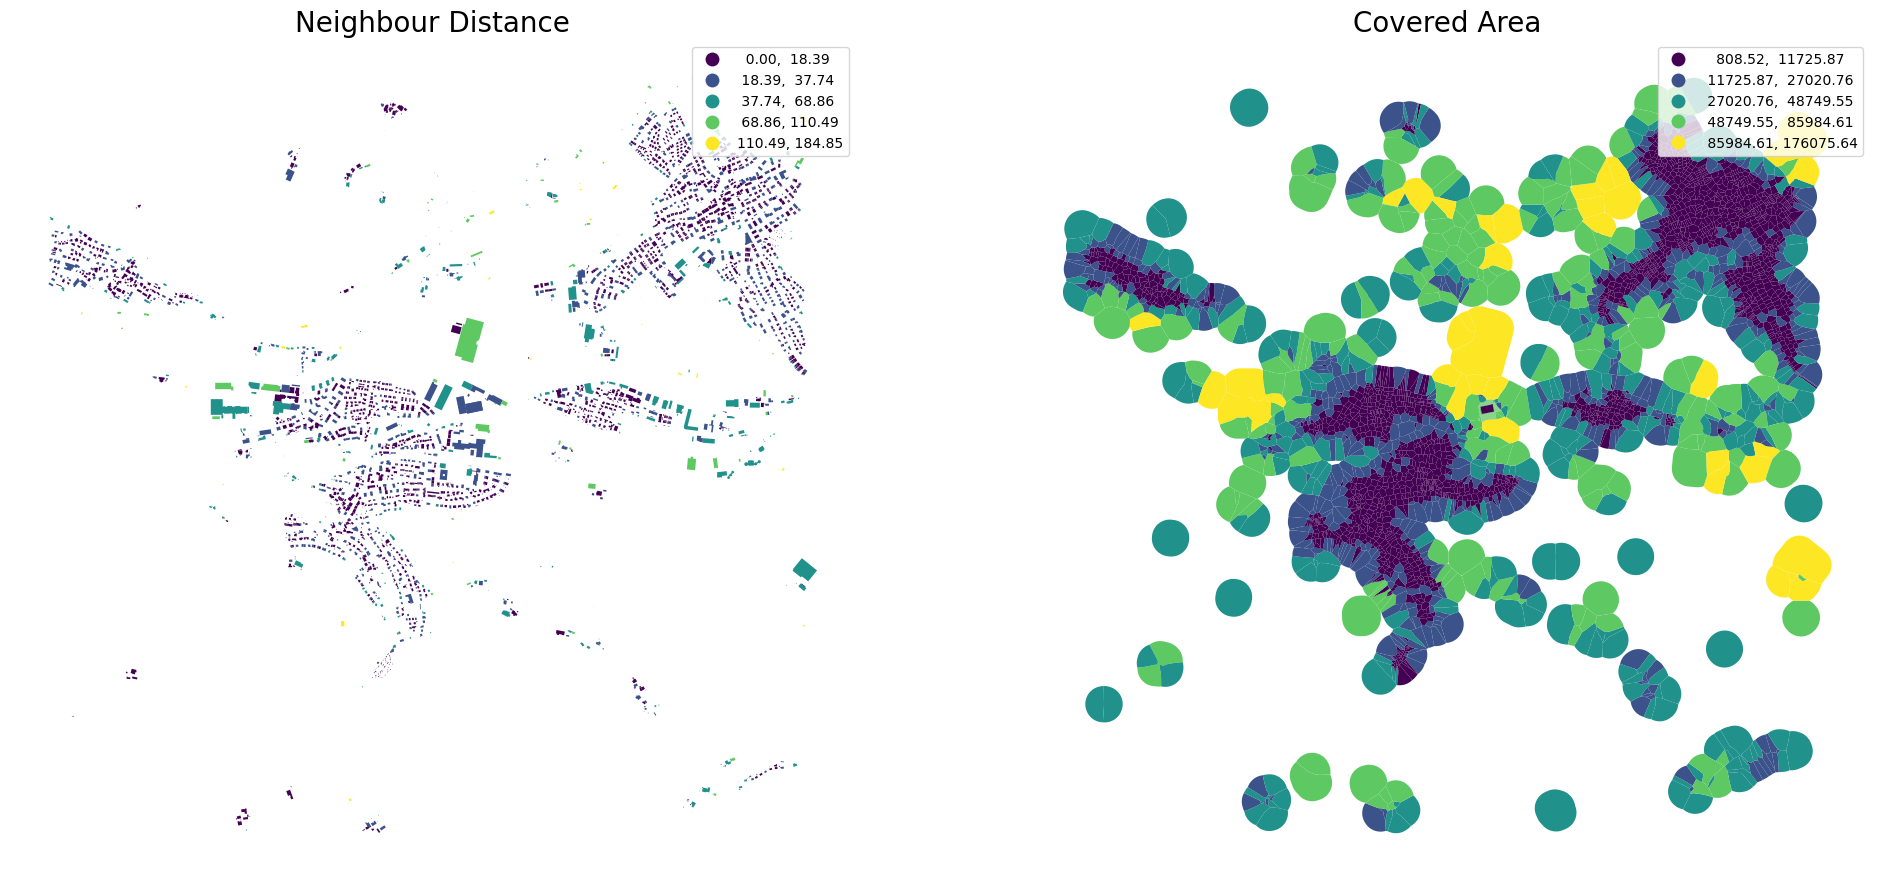

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Pfungen/neighbourdist_and_coveredarea.svg')  

In [62]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [63]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [64]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


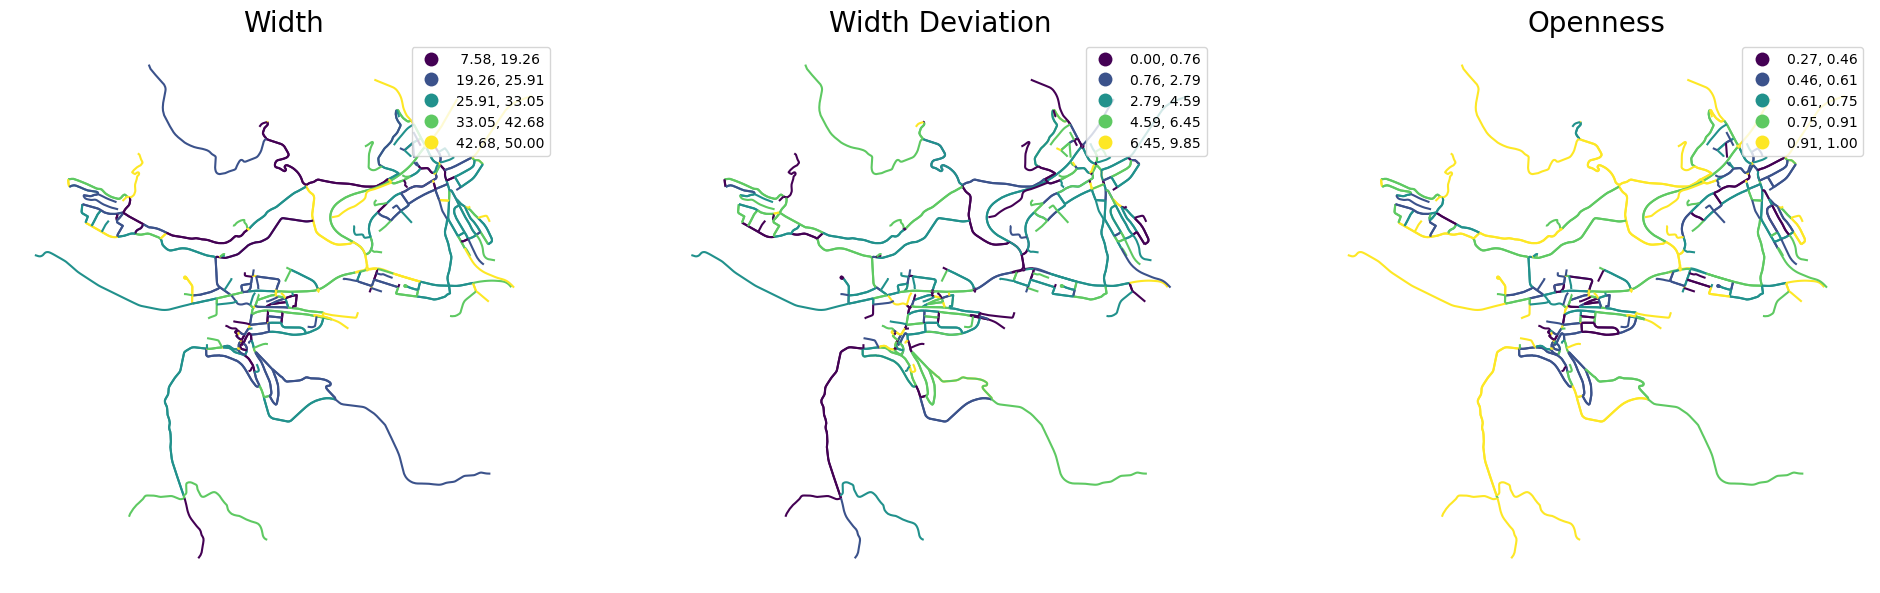

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Pfungen/road_network.svg')  

### Intensity

In [66]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


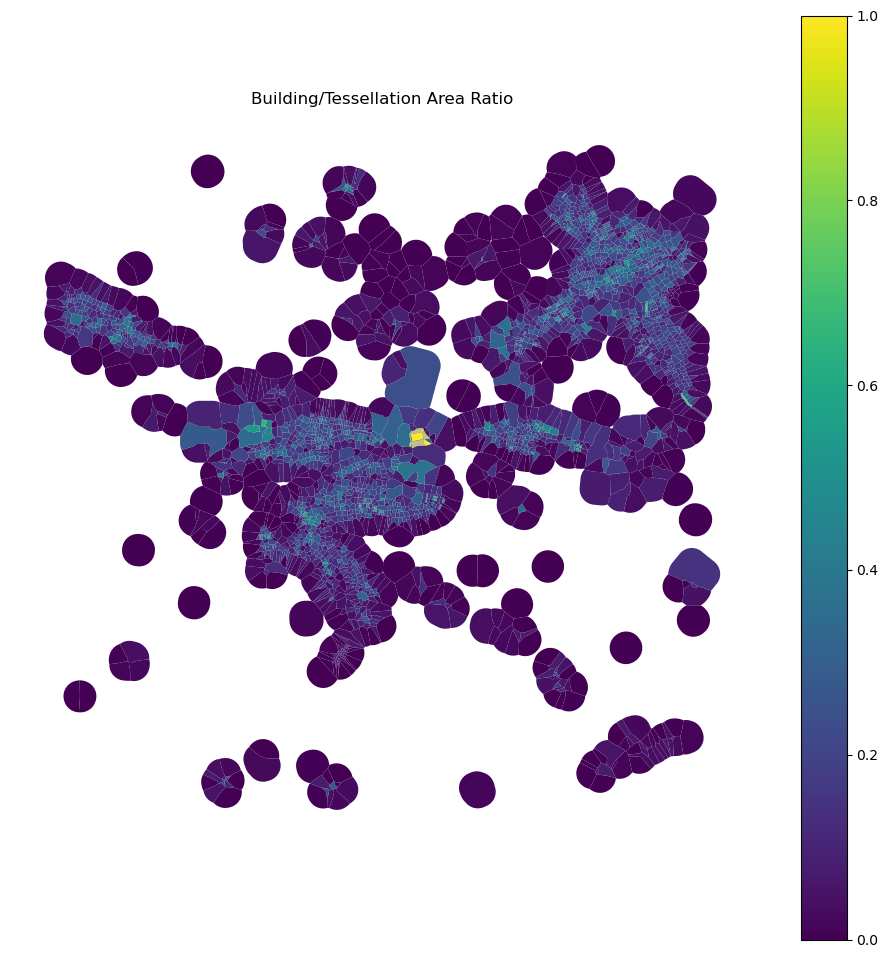

In [67]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Pfungen/tessellation_ratio.svg')  

### Connectivity

In [68]:
graph = momepy.gdf_to_nx(streets)

In [69]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

In [70]:
nodes, streets = momepy.nx_to_gdf(graph)

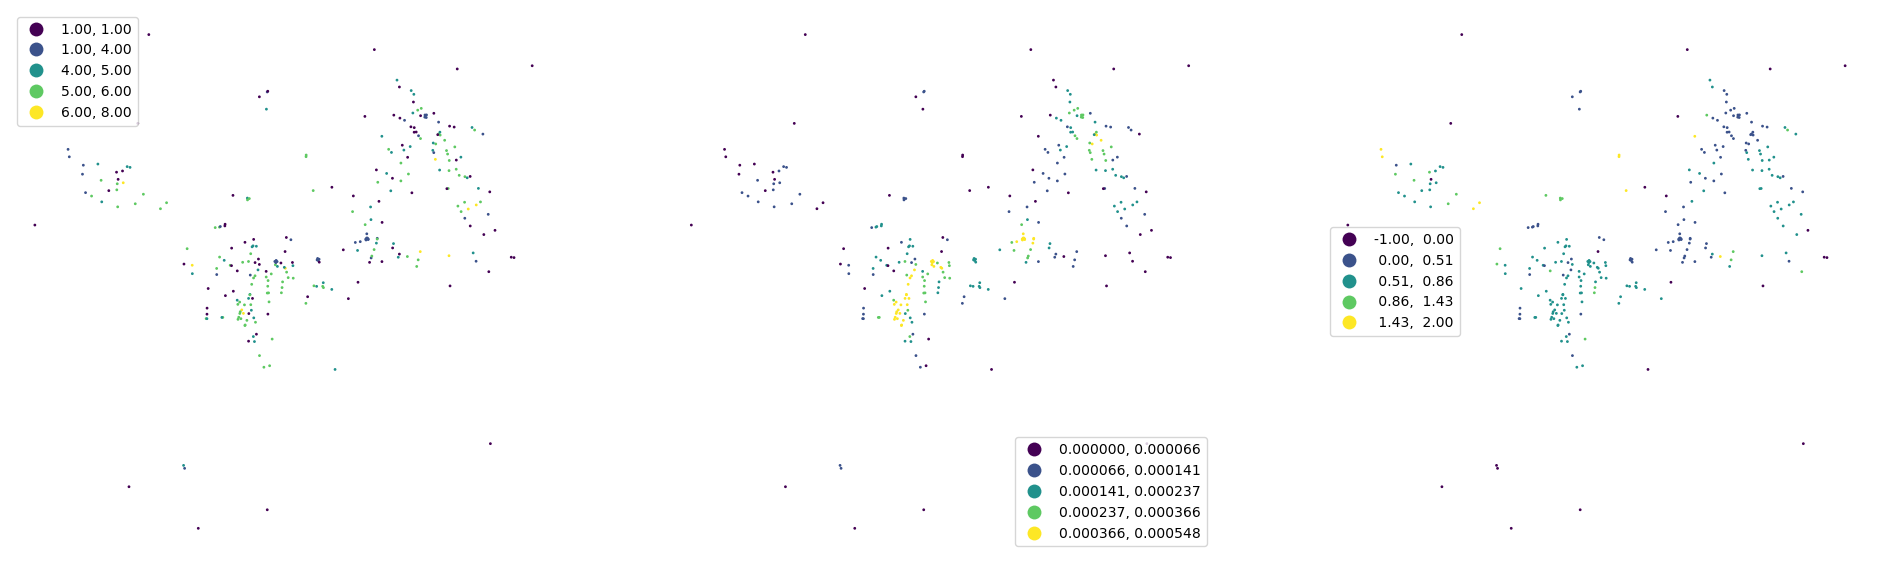

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Pfungen/connectivity.svg')  

In [72]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/3159 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [73]:
tessellation

uID                                           geometry  nID  \
0      312  POLYGON ((2690665.347 1261475.917, 2690665.746...  535   
1      309  POLYGON ((2690647.056 1261528.614, 2690646.595...  535   
2     1276  POLYGON ((2690696.394 1261536.159, 2690695.621...  535   
3     1339  POLYGON ((2690694.583 1262220.155, 2690691.673...   66   
4     1360  POLYGON ((2690703.640 1262305.610, 2690694.633...   66   
...    ...                                                ...  ...   
3154  2776  POLYGON ((2691585.549 1265048.361, 2691586.057...  549   
3155  1535  POLYGON ((2691500.271 1265063.660, 2691451.871...  549   
3156   612  POLYGON ((2691756.210 1265133.955, 2691755.904...  549   
3157  1524  POLYGON ((2691552.126 1265092.742, 2691551.412...  549   
3158   801  POLYGON ((2692078.529 1265451.307, 2692074.408...  560   

              area  convexity  neighbors  covered_area       car  
0      9769.565954   0.906932   0.007105  29096.053738  0.021565  
1      1517.349661   0.828934   0.041724  53276.527217  0.282030  
2       810.063873   0.998351   0.026368  30409.617787  0.008275  
3      1116.470941   0.994980   0.026991  28030.148164  0.004046  
4       386.393135   0.904747   0.017277   7103.511228  0.015488  
...            ...        ...        ...           ...       ...  
3154  10936.453318   0.991388   0.009101  51186.622709  0.002210  
3155   9316.182905   0.947804   0.007237  41090.471264  0.006440  
3156  18477.686237   0.994864   0.005632  59187.690269  0.008103  
3157   9900.754641   0.915787   0.006776  34256.883436  0.008987  
3158  24393.742557   0.982345   0.005128  54930.640979  0.008198  

[3159 rows x 8 columns]

In [74]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [75]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [76]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47262/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [77]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [78]:
percentiles_joined

area_x_25     area_x_50     area_x_75  convexity_25  convexity_50  \
0     2288.930733   6170.670233  14041.102126      0.912107      0.992610   
1     2288.930733   6170.670233  14041.102126      0.912107      0.992610   
2     2288.930733   6170.670233  14041.102126      0.912107      0.992610   
3      244.326186    360.794992   2331.787588      0.964332      0.983385   
4      218.929949    271.990808   1016.811285      0.964332      0.980518   
...           ...           ...           ...           ...           ...   
3154  6046.707627  10936.453318  14664.721477      0.951873      0.982249   
3155  4734.268922   8772.338622  11893.159679      0.939875      0.977535   
3156  1268.866810   5547.107065  12392.234559      0.926242      0.982249   
3157  8075.951548  10320.387264  13280.417718      0.962844      0.982249   
3158  1169.009704   2395.900275   7559.458939      0.953119      0.972988   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.996776      0.007862      0.015344      0.017257     29752.835763   
1         0.996776      0.007862      0.015344      0.017257     29752.835763   
2         0.996776      0.007862      0.015344      0.017257     29752.835763   
3         0.992533      0.017449      0.040978      0.102740      4493.466964   
4         0.990103      0.023032      0.058058      0.107926      2214.940296   
...            ...           ...           ...           ...              ...   
3154      0.991672      0.009890      0.012260      0.016744     44735.977286   
3155      0.991516      0.009495      0.012457      0.019300     41153.004845   
3156      0.991090      0.011277      0.016509      0.031000     24505.220782   
3157      0.991645      0.007517      0.010693      0.013690     51186.622709   
3158      0.989691      0.013998      0.024522      0.043953     10449.409751   

      ...          y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ...  1.261168e+06        1.0        1.0        1.0      0.000000   
1     ...  1.261168e+06        1.0        1.0        1.0      0.000000   
2     ...  1.261168e+06        1.0        1.0        1.0      0.000000   
3     ...  1.262619e+06        6.0        6.0        6.0      0.000072   
4     ...  1.262619e+06        6.0        6.0        6.0      0.000072   
...   ...           ...        ...        ...        ...           ...   
3154  ...  1.264969e+06        5.0        6.0        6.0      0.000021   
3155  ...  1.265070e+06        3.0        6.0        6.0      0.000011   
3156  ...  1.265178e+06        1.0        5.0        5.0      0.000021   
3157  ...  1.265171e+06        1.0        5.0        6.0      0.000000   
3158  ...  1.265541e+06        5.0        5.0        5.0      0.000059   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0         0.000000      0.000000      -0.000000       0.000000      -0.000000  
1         0.000000      0.000000      -0.000000       0.000000      -0.000000  
2         0.000000      0.000000      -0.000000       0.000000      -0.000000  
3         0.000072      0.000072       0.571429       0.571429       0.571429  
4         0.000072      0.000072       0.571429       0.571429       0.571429  
...            ...           ...            ...            ...            ...  
3154      0.000034      0.000034       0.454545       2.000000       2.000000  
3155      0.000034      0.000065       0.227273       1.227273       2.000000  
3156      0.000022      0.000059       0.303258       1.000000       2.000000  
3157      0.000021      0.000034       0.000000       0.454545       2.000000  
3158      0.000167      0.000193       0.320000       0.320000       0.666667  

[3159 rows x 66 columns]

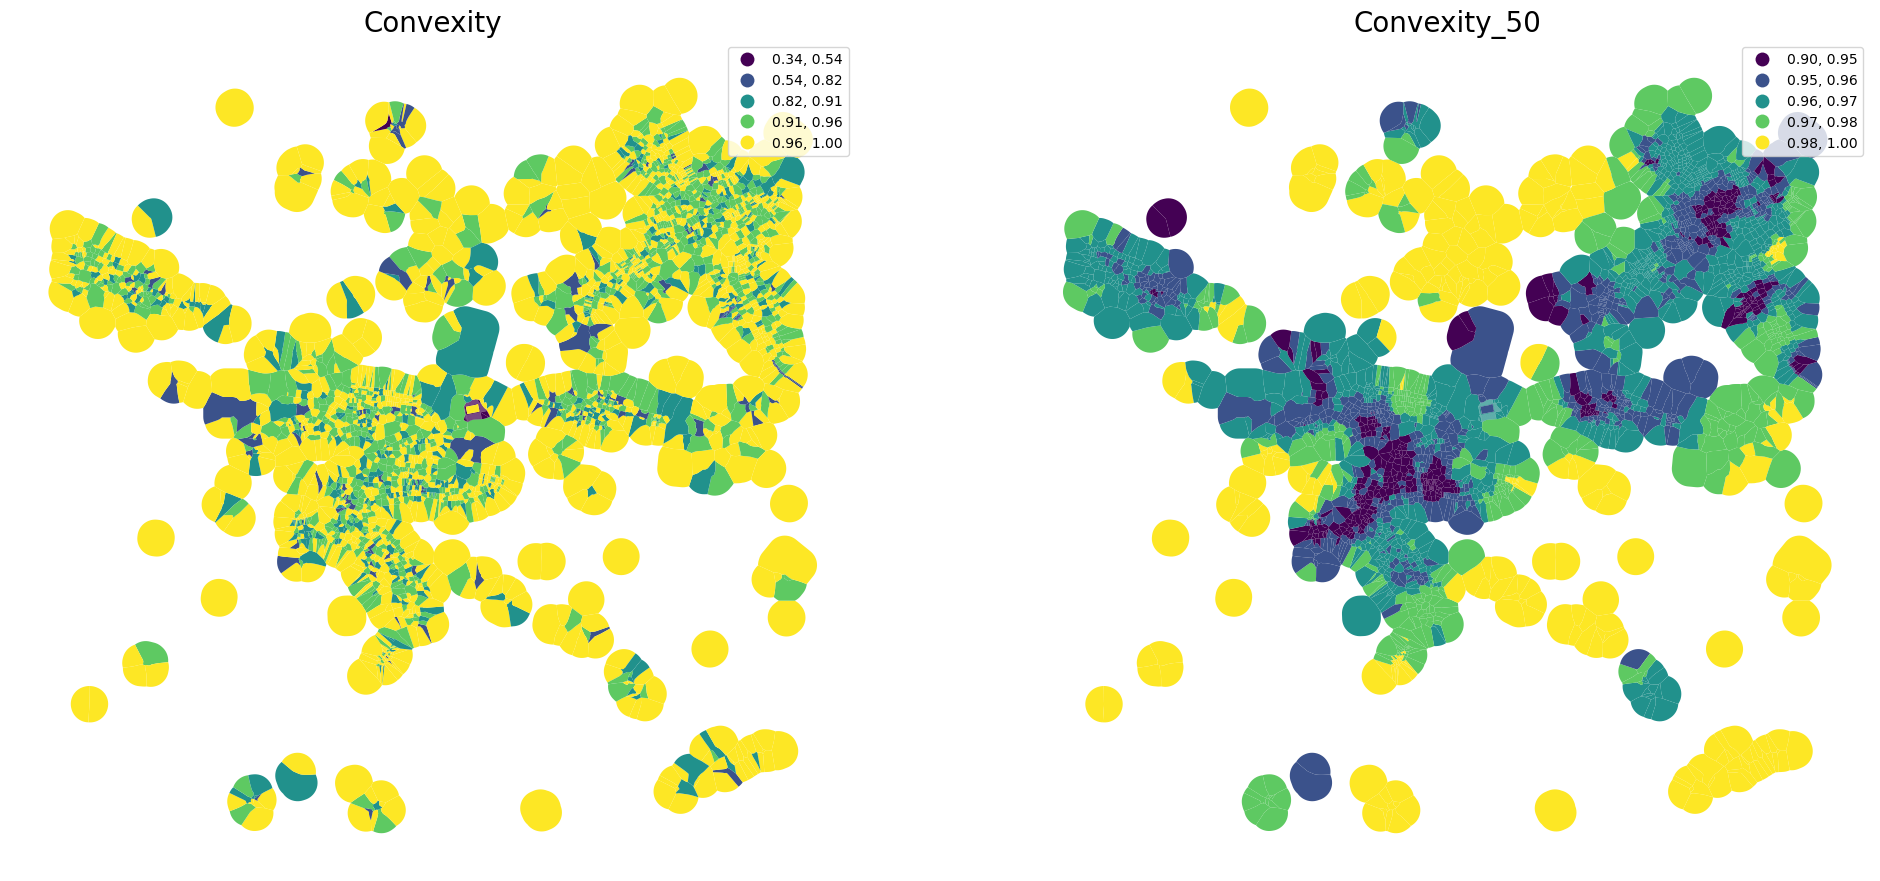

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Pfungen/convexity.svg')  

## Clustering

Standardize values before clustering.

In [80]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [81]:
standardized

area_x_25  area_x_50  area_x_75  convexity_25  convexity_50  \
0      0.607232   1.673758   2.889942     -0.513432      2.692864   
1      0.607232   1.673758   2.889942     -0.513432      2.692864   
2      0.607232   1.673758   2.889942     -0.513432      2.692864   
3     -0.291207  -0.449028  -0.172486      1.568840      1.962773   
4     -0.302366  -0.481475  -0.516402      1.568840      1.735812   
...         ...        ...        ...           ...           ...   
3154   2.258471   3.415058   3.053043      1.072086      1.872814   
3155   1.681760   2.624344   2.328174      0.593718      1.499705   
3156   0.158996   1.445923   2.458701      0.050153      1.872814   
3157   3.150159   3.189963   2.690995      1.509529      1.872814   
3158   0.115117   0.294550   1.194748      1.121769      1.139860   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         2.294825     -1.910376     -2.002724     -2.379427         2.190369   
1         2.294825     -1.910376     -2.002724     -2.379427         2.190369   
2         2.294825     -1.910376     -2.002724     -2.379427         2.190369   
3         1.768602     -1.200266     -0.315628      2.536189        -0.415202   
4         1.467262     -0.786709      0.808522      2.834409        -0.650238   
...            ...           ...           ...           ...              ...   
3154      1.661799     -1.760204     -2.205689     -2.408910         3.735920   
3155      1.642483     -1.789419     -2.192753     -2.261976         3.366327   
3156      1.589592     -1.657450     -1.926042     -1.589134         1.649063   
3157      1.658412     -1.935943     -2.308854     -2.584523         4.401321   
3158      1.416159     -1.455935     -1.398670     -0.844299         0.199169   

      ...      y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ... -3.483169  -1.558918  -2.839532  -4.227736     -1.411214   
1     ... -3.483169  -1.558918  -2.839532  -4.227736     -1.411214   
2     ... -3.483169  -1.558918  -2.839532  -4.227736     -1.411214   
3     ... -1.715048   0.944321   0.620747   0.344315     -0.655466   
4     ... -1.715048   0.944321   0.620747   0.344315     -0.655466   
...   ...       ...        ...        ...        ...           ...   
3154  ...  1.149292   0.443673   0.620747   0.344315     -1.189631   
3155  ...  1.272593  -0.557622   0.620747   0.344315     -1.300422   
3156  ...  1.403720  -1.558918  -0.071309  -0.570095     -1.189631   
3157  ...  1.395893  -1.558918  -0.071309   0.344315     -1.411214   
3158  ...  1.846029   0.443673  -0.071309  -0.570095     -0.790386   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0        -1.548506     -1.657926      -1.781581      -1.835506      -1.832341  
1        -1.548506     -1.657926      -1.781581      -1.835506      -1.832341  
2        -1.548506     -1.657926      -1.781581      -1.835506      -1.832341  
3        -0.893588     -1.073129       0.227873      -0.030779      -0.251428  
4        -0.893588     -1.073129       0.227873      -0.030779      -0.251428  
...            ...           ...            ...            ...            ...  
3154     -1.243375     -1.385465      -0.183151       4.481039       3.700854  
3155     -1.243375     -1.132688      -0.982366       2.040556       3.700854  
3156     -1.352731     -1.177530      -0.715160       1.322767       3.700854  
3157     -1.356486     -1.385465      -1.781581      -0.399927       3.700854  
3158     -0.039469     -0.094636      -0.656287      -0.824859       0.012057  

[3159 rows x 66 columns]

### How many clusters?

In [82]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.039 seconds.
K=3 fitted in 0.056 seconds.
K=4 fitted in 0.041 seconds.
K=5 fitted in 0.062 seconds.
K=6 fitted in 0.058 seconds.
K=7 fitted in 0.108 seconds.
K=8 fitted in 0.068 seconds.
K=9 fitted in 0.076 seconds.
K=10 fitted in 0.071 seconds.
K=11 fitted in 0.086 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [83]:
show(cgram.bokeh())

In [84]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   0   1   3   3   2   5   2   4   2   3
1   0   0   1   3   3   2   5   2   4   2   3
2   0   0   1   3   3   2   5   2   4   2   3
3   0   0   1   3   3   0   1   6   1   6   8
4   0   0   1   3   3   0   1   6   1   6   8

In [85]:
merged["cluster"] = cgram.labels[8].values

In [86]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [87]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [88]:
urban_types.to_file('../data/raw/Pfungen.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>